#### 그림, 실습코드 등 학습자료 출처 : https://datascienceschool.net

### # MNIST 데이터를 이용한 신경망 구현

Using TensorFlow backend.


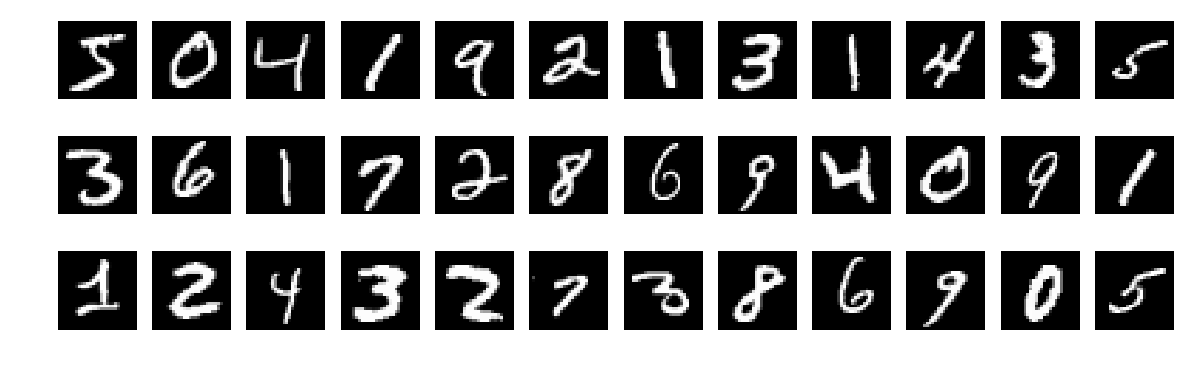

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
import matplotlib as mpl
import matplotlib.pyplot as plt

from keras.datasets import mnist
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

plt.figure(figsize=(10, 3))
for i in range(36):
    plt.subplot(3, 12, i+1)
    plt.imshow(X_train0[i], cmap="gray")
    plt.axis("off")
plt.show()

#### # tensorflow, keras 등 각종 패키지 임포트

In [2]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import pandas as pd
import numpy as np

import keras
keras.__version__

'2.2.4'

#### # MNIST 이미지 데이터는 28 X 28 임을 아래의 결과를 보고 알 수 있다.

In [3]:
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


#### # 신경망에 데이터를 입력하기 위해 아래와 같은 가공을 해준다.

1) 현재 각각의 데이터가 (28 * 28) 행렬로 이루어져 있는데 (1 * 784) 백터로 변환해준다.

2) 데이터를 'float32' 타입으로 변환 후 스케일링한다. 이는 이미지를 전처리하는 보편적인 방법 중 하나이다.

3) 데이터가 1 ~ 255 까지 구성되어 있기 때문에 255로 나누어서 0 ~ 1 로 스케일링을 해준다.

In [4]:
# 3번 예시
# 0 ~ 255까지 다양하다.
set(X_train0[0][5])

{0, 3, 18, 26, 126, 127, 136, 166, 175, 247, 255}

In [5]:
X_train = X_train0.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test0.reshape(10000, 784).astype('float32') / 255.0
print(X_train.shape, X_train.dtype)

(60000, 784) float32


4) 이 값을 `keras.np_utils.categorical()`을 사용하여 원핫인코딩(One-Hot-Encoding)로 변환한다.

- 원핫인코딩 전

In [6]:
y_train0

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

- 원핫인코딩 후

In [7]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

#### # 신경망 구현 순서

1) `Sequential` 모형 클래스 객체 생성


2) `add` 메서드로 레이어 추가.
    - 입력단부터 순차적으로 추가한다.
    - 레이어는 출력 뉴런 갯수를 첫번째 인수로 받는다.
    - 최초의 레이어는 `input_dim` 인수로 입력 크기를 설정해야 한다.
    - activation 인수로 활성화함수 설정
    
    
3) `compile` 메서드로 모형 완성.
    - `loss`인수로 비용함수 설정
    - `optimizer` 인수로 최적화 알고리즘 설정
    - `metrics` 인수로 트레이닝 단계에서 기록할 성능 기준 설정


4) `fit` 메서드로 트레이닝
    - `nb_epoch` 로 에포크(epoch) 횟수 설정
    - `batch_size` 로 배치크기(batch size) 설정
    - `verbose`는 학습 중 출력되는 문구를 설정하는 것으로, 주피터노트북(Jupyter Notebook)을 사용할 때는 verbose=2로 설정하여 진행 막대(progress bar)가 나오지 않도록 설정한다.

#### # 신경망 구현

- MNIST 이미지 신경망 구현 계획

필기 숫자에 대한 영상 정보를 입력 받아 숫자 0 ~ 9 까지의 조건부 확률을 출력하는 MLP를 구현할 것이다. 입력 영상이 28 x 28 해상도를 가진다면 입력 계층의 뉴런 수는  28×28=784  개가 된다. 출력은 숫자 0 ~ 9 까지의 조건부 확률을 출력하는  10  개의 뉴런을 가진다.

구현할 모형은  15 개의 뉴런을 가지는  1  개의 은닉 계층으로 이루어질 것이다.

<img src="1.png" width="600" />

- 실제 MNIST 이미지 신경망 구현 코드

In [8]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

np.random.seed(0)

model = Sequential()
# 입력계층 맟 은닉계층 구현코드
model.add(Dense(15, input_dim=784, activation="sigmoid"))
# 출력계층 구현코드
model.add(Dense(10, activation="sigmoid"))
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])

-  만들어진 모형은 `model_to_dot` 명령이나 `summary` 명령으로 모델 내부의 `layers` 리스트를 살펴봄으로써 내부 구조를 확인할 수 있다.

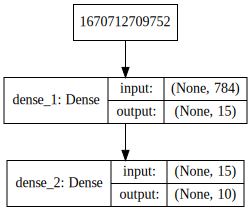

In [9]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


- layers 속성으로 각 레이어의 특성을 살펴볼 수도 있다.

In [11]:
l1 = model.layers[0]
l2 = model.layers[1]

print(l1.name, type(l1), l1.output_shape, l1.activation.__name__, l1.count_params())
print(l2.name, type(l1), l2.output_shape, l2.activation.__name__, l2.count_params())

dense_1 <class 'keras.layers.core.Dense'> (None, 15) sigmoid 11775
dense_2 <class 'keras.layers.core.Dense'> (None, 10) sigmoid 160


- 모델을 완성했다면 `fit` 메서드로 트레이닝을 시작한다.

In [12]:
%%time
hist = model.fit(X_train, Y_train,
                 epochs=10, batch_size=100,
                 validation_data=(X_test, Y_test),
                 verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 0.1019 - acc: 0.2440 - val_loss: 0.0864 - val_acc: 0.3212
Epoch 2/10
 - 1s - loss: 0.0845 - acc: 0.3921 - val_loss: 0.0821 - val_acc: 0.4409
Epoch 3/10
 - 1s - loss: 0.0796 - acc: 0.4997 - val_loss: 0.0765 - val_acc: 0.5340
Epoch 4/10
 - 1s - loss: 0.0740 - acc: 0.5620 - val_loss: 0.0707 - val_acc: 0.5852
Epoch 5/10
 - 1s - loss: 0.0682 - acc: 0.6149 - val_loss: 0.0649 - val_acc: 0.6522
Epoch 6/10
 - 1s - loss: 0.0625 - acc: 0.6759 - val_loss: 0.0594 - val_acc: 0.6998
Epoch 7/10
 - 1s - loss: 0.0576 - acc: 0.7101 - val_loss: 0.0551 - val_acc: 0.7316
Epoch 8/10
 - 1s - loss: 0.0537 - acc: 0.7325 - val_loss: 0.0516 - val_acc: 0.7485
Epoch 9/10
 - 1s - loss: 0.0505 - acc: 0.7474 - val_loss: 0.0486 - val_acc: 0.7639
Epoch 10/10
 - 1s - loss: 0.0478 - acc: 0.7608 - val_loss: 0.0461 - val_acc: 0.7759
Wall time: 7.24 s


- 학습이 끝나면 기록된 변수를 확인한다. 다음 두 그래프는 방금 학습 시킨 모델의 비용함수와 성능지표에 대한 것이다.

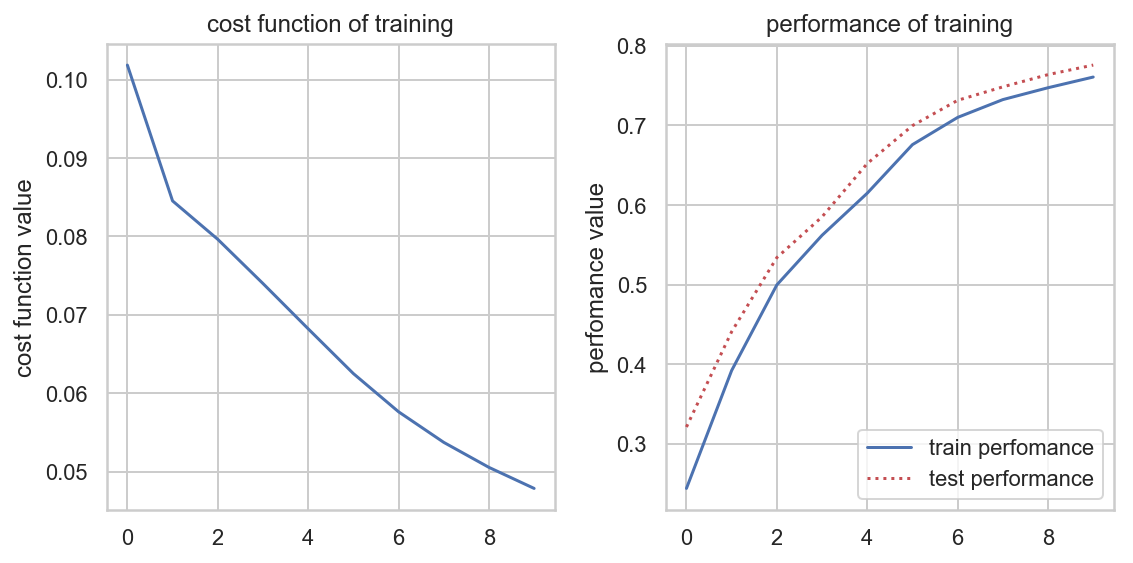

In [14]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title("cost function of training")
plt.ylabel("cost function value")
plt.subplot(1, 2, 2)
plt.title("performance of training")
plt.ylabel("perfomance value")
plt.plot(hist.history['acc'], 'b-', label="train perfomance")
plt.plot(hist.history['val_acc'], 'r:', label="test performance")
plt.legend()
plt.tight_layout()
plt.show()

#### # 가중치 정보확인

트레이닝이 끝난 모형의 가중치 정보는 `get_weights` 메서드로 구할 수 있다. 이 메서드는 신경망 모형에서 사용된 가중치  w  값과  b 값을 출력한다.

In [15]:
# 첫번째 레이어
w1 = l1.get_weights()
w1[0].shape, w1[1].shape

((784, 15), (15,))

In [16]:
# 두번째 레이어
w2 = l2.get_weights()
w2[0].shape, w2[1].shape

((15, 10), (10,))

#### # 위에서 만든 모형 사용

트레이닝이 끝난 모형은 `predict` 메서드로 y 값을 출력하거나 출력된 y값을 각 클래스에 대한 판별함수로 가정하고 `predict_classes` 메서드로 분류를 수행할 수 있다. 예로 테스트 데이터셋의 두번째 이미지를 예측하면 다음과 같다.

In [20]:
model.predict(X_test[1:2, :])

array([[0.14298885, 0.0444363 , 0.3573986 , 0.19647366, 0.03010687,
        0.14621396, 0.31485024, 0.01599035, 0.10410369, 0.00852606]],
      dtype=float32)

In [21]:
model.predict_classes(X_test[1:2, :], verbose=0)

array([2], dtype=int64)

테스트 데이터셋의 두번째 이미지를 출력해보면 다음처럼 실제로 2가 나온다

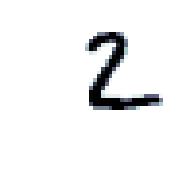

In [22]:
plt.figure(figsize=(1, 1))
plt.imshow(X_test0[1], cmap=mpl.cm.bone_r)
plt.grid(False)
plt.axis("off")
plt.show()

#### # 만든 모형 저장

트레이닝이 끝난 모형은 `save` 메서드로 가중치와 함께 "hdf5" 형식으로 저장하였다가 나중에 `load` 명령으로 불러 사용할 수 있다.

In [23]:
model.save('MNIST_model.hdf5')

In [24]:
from keras.models import load_model

model2 = load_model('MNIST_model.hdf5')
print(model2.predict_classes(X_test[1:2, :], verbose=0))

[2]


#### * 이미지 및 자료출처 : 데이터 사이언스 스쿨 홈페이지 5부 딥러닝

https://datascienceschool.net